In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from PopSynthesis.Methods.connect_HH_PP.paras_dir import processed_data, output_dir, data_dir

In [3]:
font = {'weight' : 'bold',
        'size'   : 18}
plt.rc('font', **font)

geo_lev = "POA"

In [4]:
syn_hh_bn = pd.read_csv(os.path.join(output_dir,f"syn_hh_final_{geo_lev}.csv"))
syn_pp_bn = pd.read_csv(os.path.join(output_dir,f"syn_pp_final_{geo_lev}.csv"))
syn_hh_ipu = pd.read_csv(r"C:\Users\dlaa0001\Documents\PhD\PopSyn_Monash\PopSynthesis\Methods\IPU\output\syn_hh_ipu.csv")
syn_pp_ipu = pd.read_csv(r"C:\Users\dlaa0001\Documents\PhD\PopSyn_Monash\PopSynthesis\Methods\IPU\output\syn_hh_ipu.csv")

C:\Users\dlaa0001\AppData\Local\Temp\ipykernel_1988\2128523189.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  syn_hh_bn = pd.read_csv(os.path.join(output_dir,f"syn_hh_final_{geo_lev}.csv"))


In [5]:
syn_hh_bn = syn_hh_bn.astype(str)
syn_pp_bn = syn_pp_bn.astype(str)
syn_hh_ipu = syn_hh_ipu.astype(str)
syn_pp_ipu = syn_pp_ipu.astype(str)

In [6]:
marg_hh = pd.read_csv(os.path.join(data_dir,f"hh_marginals_ipu.csv"), header=[0,1])
marg_pp = pd.read_csv(os.path.join(data_dir,f"person_marginals_ipu.csv"), header=[0,1])

In [7]:
hold = marg_hh.columns[marg_hh.columns.get_level_values(0)=="zone_id"]
marg_hh = marg_hh.set_index(hold[0])
marg_hh.index.name = geo_lev
marg_hh

sample_geog hhsize                                             \
     Unnamed: 1_level_1      1      2     3     4     5     6     7    8+   
POA                                                                         
3000                  2  11981  10112  3614  2244  1706  1616  1592  1591   
3002                  2   1170   1154   327   236   173   144   136   137   
3003                  2   1672   1760   646   392   208   179   176   170   
3004                  2   2871   2687   816   533   338   311   310   305   
3006                  2   5811   5732  1979  1113   758   712   707   702   
...                 ...    ...    ...   ...   ...   ...   ...   ...   ...   
3990                  2      7     21     9     6     5     2     2     4   
3991                  2     44     69    24    25    17    16     8     8   
3992                  2    147    214    85    73    37    22    13    17   
3995                  2   1868   2038   833   656   432   277   214   207   
3996                  2   1061   1429   507   555   393   287   262   260   

             dwelltype  ...      hhinc totalvehs                          \
     Flat or Apartment  ... Nil income         0     1     2     3    4+   
POA                     ...                                                
3000             33936  ...       3208     18125  8062  3077  2596  2596   
3002              2631  ...        149       672  1512   762   280   251   
3003              4210  ...        297      1671  2239   673   331   289   
3004              8099  ...        418      1693  4066  1330   575   507   
3006             17204  ...        988      5965  7155  2072  1187  1135   
...                ...  ...        ...       ...   ...   ...   ...   ...   
3990                 0  ...          1         3     8    18    15    12   
3991                 0  ...         11        23    46    66    43    33   
3992                 0  ...         16        28   169   234   109    68   
3995                31  ...        272       668  2305  2039   884   629   
3996                28  ...        252       466  1466  1626   682   514   

            owndwell                                          
     Being Purchased Being Rented Fully Owned Something Else  
POA                                                           
3000            2682        17983        2515          11276  
3002             451         1381         692            953  
3003             820         2678         484           1221  
3004            1255         3489        1316           2111  
3006            2216         8565        1612           5121  
...              ...          ...         ...            ...  
3990              16            1          22             17  
3991              53           33          68             57  
3992             235           82         198             93  
3995            1357         1341        2348           1479  
3996             705          567        1552           1930  

[691 rows x 44 columns]

In [8]:
hold = marg_pp.columns[marg_pp.columns.get_level_values(0)=="zone_id"]
marg_pp = marg_pp.set_index(hold[0])
marg_pp.index.name = geo_lev
marg_pp

age                                                         ...  \
       0-9 10-19 100+  20-29  30-39 40-49 50-59 60-69 70-79 80-89  ...   
POA                                                                ...   
3000  1131  2057    0  21588  10739  3433  2059  1275   619   145  ...   
3002   210   179    0    840   1032   571   614   683   537   165  ...   
3003   428   381    0   2836   2336   915   562   307   161    42  ...   
3004   604   407    9   2432   2928  1530  1111  1048   953   317  ...   
3006  1107   709    0   7932   7118  2452  1454  1108   612   187  ...   
...    ...   ...  ...    ...    ...   ...   ...   ...   ...   ...  ...   
3990     3     7    0      7     13    13    26    25    22     0  ...   
3991    31    46    0     39     42    39    67    62    50    12  ...   
3992   146   144    0    130    156   164   164   232   106    25  ...   
3995  1053  1201    4   1045   1156  1178  1500  1931  1570   688  ...   
3996   655   661    2    368    599   654   774  1266  1068   424  ...   

           persinc                                              \
     $400-599 p.w. $600-799 p.w. $800-999 p.w. Missing/Refused   
POA                                                              
3000          4049          4688          3585            5585   
3002           274           330           239             621   
3003           560           714           605            1190   
3004           949          1141           699            1967   
3006          1460          1933          1709            2693   
...            ...           ...           ...             ...   
3990             8            15             5              22   
3991            42            31            28             106   
3992           138           138            99             311   
3995          1844          1402           780            2466   
3996           794           724           427            1393   

                                    sex        anywork         
     Negative Income Zero Income      F      M       N      Y  
POA                                                            
3000             227        7764  21539  24113   15767  29885  
3002              24         686   2545   2837    1775   3607  
3003              29         619   3904   4072    2260   5716  
3004              36         737   5827   6478    3622   8683  
3006              73        2119  11197  11941    5801  17337  
...              ...         ...    ...    ...     ...    ...  
3990               3           9     61     55      39     77  
3991               5          25    195    193     168    220  
3992              10          55    624    647     482    789  
3995              71         555   5957   5536    5816   5677  
3996              36         312   3410   3151    3302   3259  

[691 rows x 28 columns]

In [34]:
# Polynomial Regression
def r_squared(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

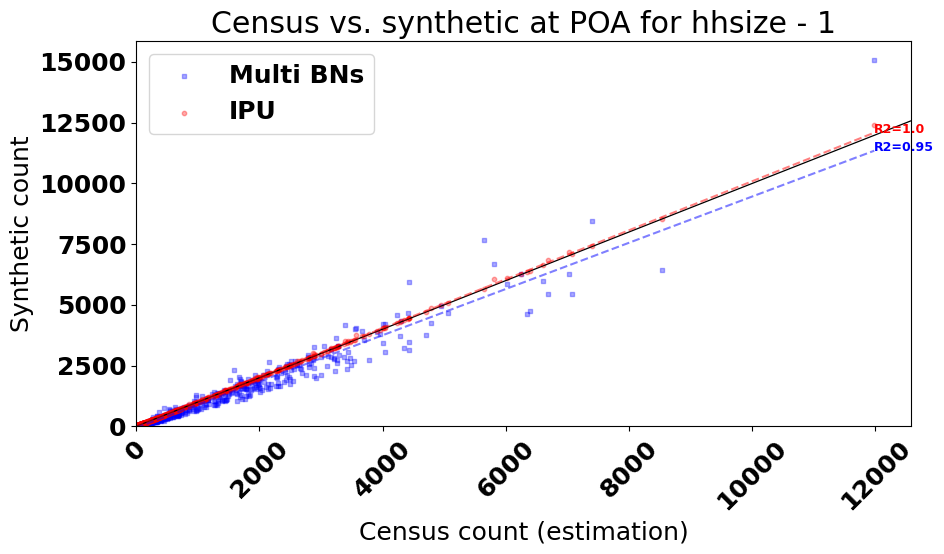

In [60]:
ls_atts = marg_hh.columns.get_level_values(0).unique()
for chosen_att in ls_atts:
    if chosen_att in ["sample_geog", "zone_id"]: 
        continue
    syn_check_bn = syn_hh_bn.groupby(chosen_att)[geo_lev].value_counts()
    syn_check_ipu = syn_hh_ipu.groupby(chosen_att)["geog"].value_counts()
    att_df = marg_hh[marg_hh.columns[marg_hh.columns.get_level_values(0)==chosen_att]]
    att_df.index = att_df.index.astype(str)

    to_plot = {}
    for val in att_df.columns.get_level_values(1).unique():
        to_plot[val] = [[], [], []]
        for poa in att_df.index:
            to_plot[val][0].append(att_df.loc[poa][(chosen_att ,val)])
            if (val, poa) in syn_check_ipu.index:
                to_plot[val][1].append(syn_check_ipu[(val, poa)])
            else:
                to_plot[val][1].append(0)
            if (val, poa) in syn_check_bn.index:
                to_plot[val][2].append(syn_check_bn[(val, poa)])
            else:
                to_plot[val][2].append(0)

    for val in att_df.columns.get_level_values(1):
        x = list(to_plot[val][0]),
        y_ipu = list(to_plot[val][1])
        y_bn = list(to_plot[val][2])

        fig = plt.figure(figsize = (10, 5))
        ax1 = fig.add_subplot(111)
        ax1.axline((0, 0), slope=1, c="black", linewidth=0.9)

        # Scatter data
        ax1.scatter(x, y_bn, s=10, c='b', marker="s", label='Multi BNs', alpha=0.33)
        ax1.scatter(x, y_ipu, s=10, c='r', marker="o", label='IPU', alpha=0.33)

        #add line of best fit to plot
        y_best_fit_ipu = np.poly1d(np.polyfit(x[0], y_ipu, 1))(np.unique(x[0]))
        y_best_fit_bn = np.poly1d(np.polyfit(x[0], y_bn, 1))(np.unique(x[0]))
        ax1.plot(np.unique(x[0]), y_best_fit_ipu, c='r', alpha=0.5, linestyle="--")
        ax1.plot(np.unique(x[0]), y_best_fit_bn, c='b', alpha=0.5, linestyle="--")

        # Cal R squared
        r_s_ipu = r_squared(x[0], y_ipu, 1)["determination"]
        r_s_bn = r_squared(x[0], y_bn, 1)["determination"]

        ax1.text(max(x[0]), max(y_best_fit_ipu), f"R2={round(r_s_ipu, 2)}", size=9, c="r")
        ax1.text(max(x[0]), max(y_best_fit_bn), f"R2={round(r_s_bn, 2)}", size=9, c="b")
        plt.xlabel(f"Census count (estimation)")
        plt.ylabel("Synthetic count")
        plt.title(f"Census vs. synthetic at {geo_lev} for {chosen_att} - {val}")
        ax1.set_xlim(left=0)
        ax1.set_ylim(bottom=0)
        plt.xticks(rotation=45)
        plt.legend()
        plt.show()